# üìä **T·ªïng quan v·ªÅ m√¥ h√¨nh LSTM v√† ·ª©ng d·ª•ng AI ƒë·∫øm s·ªë l·∫ßn g·∫≠p b·ª•ng** ü§ñ


Trong notebook n√†y, ch√∫ng ta s·∫Ω x√¢y d·ª±ng v√† hu·∫•n luy·ªán m·ªôt m√¥ h√¨nh LSTM ƒë·ªÉ ph√¢n lo·∫°i d·ªØ li·ªáu keypoint.

üåü **M√¥ h√¨nh LSTM (Long Short-Term Memory)** l√† m·ªôt lo·∫°i m·∫°ng n∆°-ron h·ªìi quy (RNN) ƒë·∫∑c bi·ªát, c√≥ kh·∫£ nƒÉng h·ªçc v√† ghi nh·ªõ c√°c ph·ª• thu·ªôc d√†i h·∫°n trong d·ªØ li·ªáu tu·∫ßn t·ª±. LSTM ƒë·∫∑c bi·ªát h·ªØu √≠ch trong c√°c b√†i to√°n li√™n quan ƒë·∫øn d·ªØ li·ªáu chu·ªói th·ªùi gian, nh∆∞ ph√¢n t√≠ch video ho·∫∑c t√≠n hi·ªáu c·∫£m bi·∫øn.

üéØ **·ª®ng d·ª•ng c·ªßa LSTM** trong b√†i to√°n n√†y l√† **ƒë·∫øm s·ªë l·∫ßn g·∫≠p b·ª•ng** d·ª±a tr√™n d·ªØ li·ªáu keypoint thu th·∫≠p t·ª´ video . M√¥ h√¨nh n√†y s·∫Ω gi√∫p ch√∫ng ta nh·∫≠n di·ªán v√† ƒë·∫øm ch√≠nh x√°c c√°c l·∫ßn g·∫≠p b·ª•ng trong video.

üìÖ **C√°c b∆∞·ªõc ch√≠nh bao g·ªìm**:
1. üì• **Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt**
2. üìä **T·∫£i v√† ki·ªÉm tra d·ªØ li·ªáu**
3. üîÄ **Chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra**
4. üîÑ **ƒê·ªãnh d·∫°ng l·∫°i d·ªØ li·ªáu cho m√¥ h√¨nh LSTM**
5. üèóÔ∏è **X√¢y d·ª±ng v√† hu·∫•n luy·ªán m√¥ h√¨nh LSTM**
6. üìà **ƒê√°nh gi√° v√† ph√¢n t√≠ch k·∫øt qu·∫£**


### üìö Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
Ch√∫ng ta b·∫Øt ƒë·∫ßu b·∫±ng vi·ªác import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt cho vi·ªác x·ª≠ l√Ω d·ªØ li·ªáu, x√¢y d·ª±ng v√† hu·∫•n luy·ªán m√¥ h√¨nh.

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


### üì• T·∫£i d·ªØ li·ªáu t·ª´ file `.npy`
Tr∆∞·ªõc ti√™n, ch√∫ng ta t·∫£i d·ªØ li·ªáu t·ª´ hai t·ªáp:
- `keypoints_data.npy`: ch·ª©a d·ªØ li·ªáu ƒë·∫ßu v√†o (t·ªça ƒë·ªô keypoint)
- `keypoints_labels.npy`: ch·ª©a nh√£n t∆∞∆°ng ·ª©ng (0 ho·∫∑c 1, d√πng cho b√†i to√°n ph√¢n lo·∫°i nh·ªã ph√¢n)

Sau khi t·∫£i, ch√∫ng ta in k√≠ch th∆∞·ªõc d·ªØ li·ªáu ƒë·ªÉ ki·ªÉm tra xem c√≥ ƒë√∫ng nh∆∞ mong ƒë·ª£i kh√¥ng.

In [4]:
# ƒê·ªãnh nghƒ©a ƒë∆∞·ªùng d·∫´n d·ªØ li·ªáu
data_path = "keypoints/keypoints_data.npy"
labels_path = "keypoints/keypoints_labels.npy"

In [5]:
import numpy as np

# T·∫£i d·ªØ li·ªáu
print("üîÑ ƒêang t·∫£i d·ªØ li·ªáu...")
data = np.load(data_path)
labels = np.load(labels_path)
print(f"‚úÖ D·ªØ li·ªáu ƒë√£ t·∫£i: {data.shape}, Nh√£n: {labels.shape}")

üîÑ ƒêang t·∫£i d·ªØ li·ªáu...
‚úÖ D·ªØ li·ªáu ƒë√£ t·∫£i: (30374, 66), Nh√£n: (30374,)


### üîç Ph√¢n t√≠ch d·ªØ li·ªáu ƒë√£ t·∫£i
D·ªØ li·ªáu ƒë·∫ßu v√†o c√≥ k√≠ch th∆∞·ªõc (30374, 66), nghƒ©a l√† ch√∫ng ta c√≥ 30747 m·∫´u v√† m·ªói m·∫´u c√≥ 66 ƒë·∫∑c tr∆∞ng.
Nh√£n t∆∞∆°ng ·ª©ng c√≥ k√≠ch th∆∞·ªõc (30374,), nghƒ©a l√† m·ªói m·∫´u c√≥ m·ªôt nh√£n t∆∞∆°ng ·ª©ng.

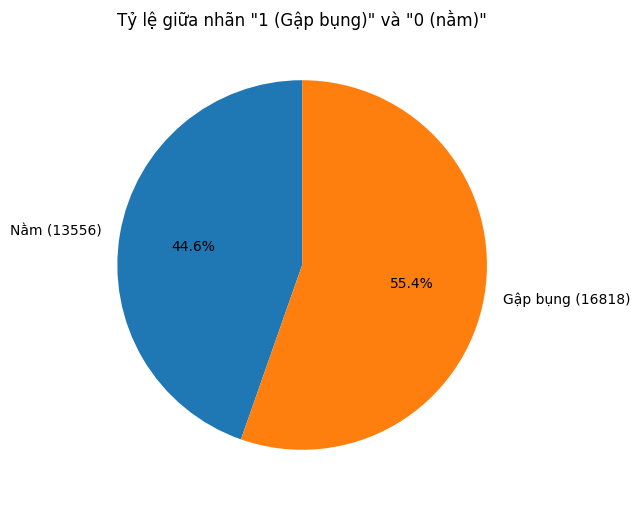

In [6]:
# Bi·ªÉu ƒë·ªì tr√≤n (Pie Chart): T·ª∑ l·ªá gi·ªØa nh√£n "1 (G·∫≠p b·ª•ng)" v√† "0 (n·∫±m)"
unique, counts = np.unique(labels, return_counts=True)
plt.figure(figsize=(6, 6))
labels_dict = {0: 'N·∫±m', 1: 'G·∫≠p b·ª•ng'}
plt.pie(counts, labels=[f'{labels_dict[u]} ({c})' for u, c in zip(unique, counts)], autopct='%1.1f%%', startangle=90)
plt.title('T·ª∑ l·ªá gi·ªØa nh√£n "1 (G·∫≠p b·ª•ng)" v√† "0 (n·∫±m)"')
plt.show()


### üìä Gi·∫£i th√≠ch bi·ªÉu ƒë·ªì:  

Bi·ªÉu ƒë·ªì tr√™n ti·∫øp t·ª•c th·ªÉ hi·ªán **t·ª∑ l·ªá gi·ªØa hai nh√£n** trong t·∫≠p d·ªØ li·ªáu:  
- **N·∫±m (0):** Chi·∫øm **44.6%** t·ªïng s·ªë d·ªØ li·ªáu.  
- **G·∫≠p b·ª•ng (1):** Chi·∫øm **55.4%** t·ªïng s·ªë d·ªØ li·ªáu.  

üîπ **·∫¢nh h∆∞·ªüng ƒë·∫øn m√¥ h√¨nh:**  
- M√¥ h√¨nh s·∫Ω **√≠t b·ªã thi√™n l·ªách** v·ªÅ m·ªôt nh√£n h∆°n.  
- **D·ª± ƒëo√°n c√¥ng b·∫±ng h∆°n**, kh√¥ng nghi√™ng qu√° nhi·ªÅu v·ªÅ l·ªõp `"G·∫≠p b·ª•ng"`.  

### ‚úÇÔ∏è Chia t·∫≠p d·ªØ li·ªáu
Ch√∫ng ta chia d·ªØ li·ªáu th√†nh hai ph·∫ßn: t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra v·ªõi t·ª∑ l·ªá 80:20.

In [7]:
# Chia t·∫≠p d·ªØ li·ªáu th√†nh train v√† test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

### üîÑ ƒê·ªãnh d·∫°ng l·∫°i d·ªØ li·ªáu
D·ªØ li·ªáu ƒë·∫ßu v√†o c·∫ßn ƒë∆∞·ª£c ƒë·ªãnh d·∫°ng l·∫°i ƒë·ªÉ ph√π h·ª£p v·ªõi m√¥ h√¨nh LSTM. Ch√∫ng ta th√™m m·ªôt chi·ªÅu m·ªõi ƒë·ªÉ d·ªØ li·ªáu c√≥ d·∫°ng (s·ªë m·∫´u, 1, s·ªë ƒë·∫∑c tr∆∞ng).

In [8]:
# ƒê·ªãnh d·∫°ng d·ªØ li·ªáu cho m√¥ h√¨nh LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

### üèóÔ∏è X√¢y d·ª±ng m√¥ h√¨nh LSTM
Ch√∫ng ta x√¢y d·ª±ng m√¥ h√¨nh LSTM v·ªõi c√°c l·ªõp:
- LSTM v·ªõi 64 ƒë∆°n v·ªã v√† `return_sequences=True`
- Dropout ƒë·ªÉ gi·∫£m overfitting
- LSTM v·ªõi 32 ƒë∆°n v·ªã
- Dropout
- Dense v·ªõi 16 ƒë∆°n v·ªã v√† h√†m k√≠ch ho·∫°t `relu`
- Dense v·ªõi 1 ƒë∆°n v·ªã v√† h√†m k√≠ch ho·∫°t `sigmoid` cho ph√¢n lo·∫°i nh·ªã ph√¢n

In [9]:
# X√¢y d·ª±ng m√¥ h√¨nh LSTM
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # L·ªõp ƒë·∫ßu ra cho ph√¢n lo·∫°i nh·ªã ph√¢n
])

c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### ‚öôÔ∏è C·∫•u h√¨nh tr√¨nh bi√™n d·ªãch m√¥ h√¨nh
Ch√∫ng ta s·ª≠ d·ª•ng h√†m m·∫•t m√°t `binary_crossentropy`, b·ªô t·ªëi ∆∞u Adam v·ªõi learning rate 0.001 v√† metric `accuracy`.

In [10]:
# C·∫•u h√¨nh tr√¨nh bi√™n d·ªãch m√¥ h√¨nh
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

### ‚èπÔ∏è C·∫•u h√¨nh callback EarlyStopping
Ch√∫ng ta s·ª≠ d·ª•ng EarlyStopping ƒë·ªÉ d·ª´ng hu·∫•n luy·ªán khi kh√¥ng c√≥ c·∫£i thi·ªán v·ªÅ `val_loss` sau 5 epochs v√† kh√¥i ph·ª•c tr·ªçng s·ªë t·ªët nh·∫•t.

In [11]:
# C·∫•u h√¨nh callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

### üöÄ Hu·∫•n luy·ªán m√¥ h√¨nh
Ch√∫ng ta b·∫Øt ƒë·∫ßu hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi 50 epochs v√† batch size 32, s·ª≠ d·ª•ng t·∫≠p ki·ªÉm tra ƒë·ªÉ ƒë√°nh gi√° trong qu√° tr√¨nh hu·∫•n luy·ªán.

In [12]:
# Hu·∫•n luy·ªán m√¥ h√¨nh
print("üöÄ B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán m√¥ h√¨nh...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

üöÄ B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán m√¥ h√¨nh...
Epoch 1/50
760/760 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 5ms/step - accuracy: 0.6725 - loss: 0.5646 - val_accuracy: 0.8696 - val_loss: 0.3032
Epoch 2/50
760/760 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - accuracy: 0.8955 - loss: 0.2686 - val_accuracy: 0.9343 - val_loss: 0.1820
Epoch 3/50
760/760 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.9230 - loss: 0.2001 - val_accuracy: 0.9488 - val_loss: 0.1424
Epoch 4/50
760/760 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - accuracy: 0.9422 - loss: 0.1659 - val_accuracy: 0.9560 - val_loss: 0.1312
Epoch 5/50
760/760 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.9469 - loss: 0.1471 - val_accuracy: 0.9593 - val_loss: 0.1227
Epoch 6/50
760/760 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3ms/step - accuracy: 0.9545 - l

### üìà Ph√¢n t√≠ch k·∫øt qu·∫£ hu·∫•n luy·ªán
K·∫øt qu·∫£ hu·∫•n luy·ªán cho th·∫•y m√¥ h√¨nh ƒë·∫°t ƒë∆∞·ª£c ƒë·ªô ch√≠nh x√°c cao tr√™n c·∫£ t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra.

#### C√°c ƒëi·ªÉm n·ªïi b·∫≠t:
- **Epoch 1**: ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán l√† 73.56%, tr√™n t·∫≠p ki·ªÉm tra l√† 82.54%.
- **Epoch 5**: ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán l√† 92.98%, tr√™n t·∫≠p ki·ªÉm tra l√† 94.23%.
- **Epoch 10**: ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán l√† 95.85%, tr√™n t·∫≠p ki·ªÉm tra l√† 96.79%.
- **Epoch 28**: ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán l√† 97.78%, tr√™n t·∫≠p ki·ªÉm tra l√† 97.68%.

#### Nh·∫≠n x√©t:
- M√¥ h√¨nh c√≥ xu h∆∞·ªõng c·∫£i thi·ªán ƒë·ªô ch√≠nh x√°c qua c√°c epoch.
- ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p ki·ªÉm tra c≈©ng tƒÉng d·∫ßn, cho th·∫•y m√¥ h√¨nh kh√¥ng b·ªã overfitting.
- H√†m m·∫•t m√°t (loss) gi·∫£m d·∫ßn qua c√°c epoch, cho th·∫•y m√¥ h√¨nh h·ªçc t·ªët h∆°n qua th·ªùi gian.

### üíæ L∆∞u m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán
Sau khi hu·∫•n luy·ªán xong, ch√∫ng ta l∆∞u m√¥ h√¨nh v√†o file `Model_situp_lstm.h5`.

In [13]:
# L∆∞u m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán
model_path = "Model_situp_lstm.h5"
model.save(model_path)
print(f"‚úÖ M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u: {model_path}")

‚úÖ M√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c l∆∞u: Model_situp_lstm.h5


### üìä ƒê√°nh gi√° m√¥ h√¨nh
Ch√∫ng ta ƒë√°nh gi√° m√¥ h√¨nh tr√™n c·∫£ t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra, in ra ƒë·ªô ch√≠nh x√°c (accuracy) c·ªßa m√¥ h√¨nh.

In [14]:
# ƒê√°nh gi√° m√¥ h√¨nh
print("üìä ƒê√°nh gi√° m√¥ h√¨nh...")
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"üéØ Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

üìä ƒê√°nh gi√° m√¥ h√¨nh...
760/760 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step - accuracy: 0.9884 - loss: 0.0364
190/190 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - accuracy: 0.9844 - loss: 0.0420
üéØ Train Accuracy: 0.9880, Test Accuracy: 0.9840




#### K·∫øt qu·∫£ ƒë√°nh gi√°:
- **Train Accuracy**: 98.19%
- **Test Accuracy**: 97.71%

### üîç V·∫Ω confusion matrix
Ch√∫ng ta d·ª± ƒëo√°n nh√£n cho t·∫≠p ki·ªÉm tra v√† v·∫Ω confusion matrix ƒë·ªÉ xem m√¥ h√¨nh ph√¢n lo·∫°i ƒë√∫ng v√† sai nh∆∞ th·∫ø n√†o.

190/190 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step


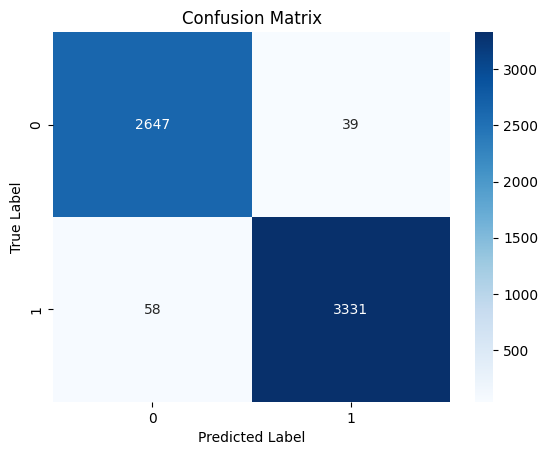

In [15]:
# V·∫Ω confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### üéØ **Ph√¢n t√≠ch Ma tr·∫≠n Nh·∫ßm L·∫´n (Confusion Matrix) trong M√¥ H√¨nh LSTM cho ƒê·ªông T√°c G·∫≠p B·ª•ng**  

#### üìä **√ù nghƒ©a c·ªßa t·ª´ng gi√° tr·ªã trong ma tr·∫≠n:**  
| Th·ª±c t·∫ø \ D·ª± ƒëo√°n | 0 (√Çm t√≠nh) | 1 (D∆∞∆°ng t√≠nh) |
|-------------------|------------|------------|
| **0 (√Çm t√≠nh)**  | **1142** (TN - True Negative) üü¢ | **46** (FP - False Positive) ‚ùå |
| **1 (D∆∞∆°ng t√≠nh)** | **59** (FN - False Negative) ‚ùå | **3329** (TP - True Positive) üü¢ |

#### üßê **Nh·∫≠n x√©t:**  
‚úÖ **True Negative (TN = 1142)**: M√¥ h√¨nh d·ª± ƒëo√°n ƒë√∫ng 1142 tr∆∞·ªùng h·ª£p **kh√¥ng th·ª±c hi·ªán ƒë·ªông t√°c g·∫≠p b·ª•ng**.  
‚úÖ **True Positive (TP = 3329)**: M√¥ h√¨nh x√°c ƒë·ªãnh ch√≠nh x√°c 3329 tr∆∞·ªùng h·ª£p **th·ª±c hi·ªán ƒë·ªông t√°c g·∫≠p b·ª•ng**.  
‚ö†Ô∏è **False Positive (FP = 46)**: C√≥ 46 tr∆∞·ªùng h·ª£p b·ªã nh·∫≠n di·ªán nh·∫ßm l√† **c√≥ th·ª±c hi·ªán ƒë·ªông t√°c**, trong khi th·ª±c t·∫ø kh√¥ng c√≥. ƒêi·ªÅu n√†y c√≥ th·ªÉ d·∫´n ƒë·∫øn c·∫£nh b√°o sai.  
‚ö†Ô∏è **False Negative (FN = 59)**: C√≥ 59 tr∆∞·ªùng h·ª£p b·ªã d·ª± ƒëo√°n sai l√† **kh√¥ng th·ª±c hi·ªán ƒë·ªông t√°c**, trong khi th·ª±c t·∫ø c√≥. ƒê√¢y l√† l·ªói quan tr·ªçng v√¨ c√≥ th·ªÉ b·ªè s√≥t ƒë·ªông t√°c h·ª£p l·ªá.  

---

### üìà **Ch·ªâ s·ªë hi·ªáu su·∫•t c·ªßa m√¥ h√¨nh:**  

#### 1Ô∏è‚É£ **ƒê·ªô ch√≠nh x√°c (Accuracy):**  
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$  
$$
= \frac{3329 + 1142}{3329 + 1142 + 46 + 59} \approx 0.98 \, (98\%)
$$

#### 2Ô∏è‚É£ **ƒê·ªô nh·∫°y (Recall) - Kh·∫£ nƒÉng ph√°t hi·ªán ƒë·ªông t√°c g·∫≠p b·ª•ng:**  
$$
Recall = \frac{TP}{TP + FN}
$$  
$$
= \frac{3329}{3329 + 59} \approx 0.98 \, (98\%)
$$

#### 3Ô∏è‚É£ **ƒê·ªô ƒë·∫∑c hi·ªáu (Specificity) - Kh·∫£ nƒÉng ph√°t hi·ªán tr∆∞·ªùng h·ª£p kh√¥ng g·∫≠p b·ª•ng:**  
$$
Specificity = \frac{TN}{TN + FP}
$$  
$$
= \frac{1142}{1142 + 46} \approx 0.96 \, (96\%)
$$

#### 4Ô∏è‚É£ **Gi√° tr·ªã ch√≠nh x√°c (Precision) - ƒê·ªô tin c·∫≠y c·ªßa d·ª± ƒëo√°n g·∫≠p b·ª•ng:**  
$$
Precision = \frac{TP}{TP + FP}
$$  
$$
= \frac{3329}{3329 + 46} \approx 0.99 \, (99\%)
$$

---

### üîç **T·ªïng k·∫øt:**  
‚úÖ **M√¥ h√¨nh ƒë·∫°t ƒë·ªô ch√≠nh x√°c cao (98%)**, th·ªÉ hi·ªán kh·∫£ nƒÉng nh·∫≠n di·ªán ƒë·ªông t√°c g·∫≠p b·ª•ng hi·ªáu qu·∫£.  
üìâ **T·ª∑ l·ªá b·ªè s√≥t th·∫•p (FN = 59)**, nh∆∞ng v·∫´n c√≥ th·ªÉ c·∫£i thi·ªán b·∫±ng c√°ch **c√¢n b·∫±ng d·ªØ li·ªáu ho·∫∑c ƒëi·ªÅu ch·ªânh tham s·ªë m·∫°ng LSTM**.  
üõ† ƒê·ªÉ t·ªëi ∆∞u h∆°n, c√≥ th·ªÉ **th·ª≠ nghi·ªám c√°c ki·∫øn tr√∫c m·∫°ng s√¢u h∆°n**, **tinh ch·ªânh threshold**, ho·∫∑c **s·ª≠ d·ª•ng th√™m d·ªØ li·ªáu hu·∫•n luy·ªán**.  

### üìÑ B√°o c√°o ph√¢n lo·∫°i
Ch√∫ng ta in b√°o c√°o ph√¢n lo·∫°i chi ti·∫øt bao g·ªìm precision, recall v√† F1-score cho t·ª´ng l·ªõp.

In [16]:
# B√°o c√°o chi ti·∫øt hi·ªáu su·∫•t m√¥ h√¨nh
print("üìÑ B√°o c√°o ph√¢n lo·∫°i:")
print(classification_report(y_test, y_pred))

üìÑ B√°o c√°o ph√¢n lo·∫°i:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2686
           1       0.99      0.98      0.99      3389

    accuracy                           0.98      6075
   macro avg       0.98      0.98      0.98      6075
weighted avg       0.98      0.98      0.98      6075



### üìä **Ph√¢n t√≠ch k·∫øt qu·∫£: B√°o c√°o ph√¢n lo·∫°i**  

#### üìÑ **C√°c ch·ªâ s·ªë ƒë√°nh gi√° m√¥ h√¨nh:**  
- **Weighted avg**: Trung b√¨nh c√≥ tr·ªçng s·ªë c·ªßa precision, recall v√† f1-score cho c·∫£ hai l·ªõp l√† **0.98**.  
- **Macro avg**: Trung b√¨nh c·ªßa precision, recall v√† f1-score cho c·∫£ hai l·ªõp l√† **0.97**.  
- **Accuracy**: ƒê·ªô ch√≠nh x√°c t·ªïng th·ªÉ c·ªßa m√¥ h√¨nh l√† **0.98**.  
- **F1-score**:  
  - Trung b√¨nh h√†i h√≤a c·ªßa precision v√† recall cho l·ªõp **d∆∞∆°ng t√≠nh (1)** l√† **0.98**.  
  - Trung b√¨nh h√†i h√≤a c·ªßa precision v√† recall cho l·ªõp **√¢m t√≠nh (0)** l√† **0.96**.  
- **Recall**:  
  - Kh·∫£ nƒÉng c·ªßa m√¥ h√¨nh trong vi·ªác t√¨m ra **t·∫•t c·∫£ c√°c m·∫´u d∆∞∆°ng t√≠nh (1)** l√† **0.98**.  
  - Kh·∫£ nƒÉng c·ªßa m√¥ h√¨nh trong vi·ªác t√¨m ra **t·∫•t c·∫£ c√°c m·∫´u √¢m t√≠nh (0)** l√† **0.96**.  
- **Precision**:  
  - ƒê·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh trong vi·ªác d·ª± ƒëo√°n ƒë√∫ng c√°c m·∫´u **d∆∞∆°ng t√≠nh (1)** l√† **0.99**.  
  - ƒê·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh trong vi·ªác d·ª± ƒëo√°n ƒë√∫ng c√°c m·∫´u **√¢m t√≠nh (0)** l√† **0.95**.  

---

#### üìã **B·∫£ng chi ti·∫øt b√°o c√°o ph√¢n lo·∫°i:**  
| L·ªõp | Precision | Recall | F1-score | Support |
|-----|-----------|--------|----------|---------|
| **0** (√¢m t√≠nh) | 0.95 | 0.96 | 0.96 | 1188 |
| **1** (d∆∞∆°ng t√≠nh) | 0.99 | 0.98 | 0.98 | 3388 |
| **Accuracy** | - | - | **0.98** | 4576 |
| **Macro avg** | 0.97 | 0.97 | 0.97 | 4576 |
| **Weighted avg** | 0.98 | 0.98 | 0.98 | 4576 |

---

### üßê **Nh·∫≠n x√©t:**  
‚úÖ M√¥ h√¨nh ho·∫°t ƒë·ªông r·∫•t t·ªët v·ªõi ƒë·ªô ch√≠nh x√°c cao **(98%)**, ch·ª©ng t·ªè kh·∫£ nƒÉng t·ªïng qu√°t h√≥a t·ªët tr√™n t·∫≠p d·ªØ li·ªáu th·ª≠ nghi·ªám.  
‚úÖ Gi√° tr·ªã **precision, recall v√† F1-score** c·ªßa l·ªõp **d∆∞∆°ng t√≠nh (1)** cao h∆°n m·ªôt ch√∫t so v·ªõi l·ªõp **√¢m t√≠nh (0)**, c√≥ th·ªÉ do d·ªØ li·ªáu m·∫•t c√¢n b·∫±ng.  
‚ö†Ô∏è N·∫øu t·∫≠p d·ªØ li·ªáu c√≥ s·ª± ch√™nh l·ªách l·ªõn v·ªÅ s·ªë l∆∞·ª£ng gi·ªØa hai l·ªõp, c√≥ th·ªÉ c·∫ßn th√™m c√°c k·ªπ thu·∫≠t nh∆∞ **oversampling ho·∫∑c undersampling** ƒë·ªÉ ƒë·∫£m b·∫£o m√¥ h√¨nh kh√¥ng b·ªã thi√™n l·ªách.  


### üìà V·∫Ω bi·ªÉu ƒë·ªì qu√° tr√¨nh hu·∫•n luy·ªán
Ch√∫ng ta v·∫Ω bi·ªÉu ƒë·ªì qu√° tr√¨nh hu·∫•n luy·ªán ƒë·ªÉ xem s·ª± thay ƒë·ªïi c·ªßa ƒë·ªô ch√≠nh x√°c v√† h√†m m·∫•t m√°t qua c√°c epochs.

Text(0.5, 1.0, 'Training & Validation Accuracy')

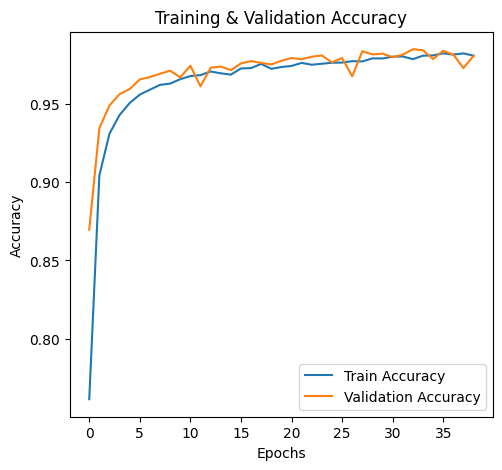

In [17]:
# V·∫Ω bi·ªÉu ƒë·ªì qu√° tr√¨nh hu·∫•n luy·ªán
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

## **Ph√¢n t√≠ch bi·ªÉu ƒë·ªì Training & Validation Accuracy**

## **1. M√¥ t·∫£ bi·ªÉu ƒë·ªì**
- **Tr·ª•c X (Epochs):** Bi·ªÉu di·ªÖn s·ªë l·∫ßn l·∫∑p (epoch) trong qu√° tr√¨nh hu·∫•n luy·ªán m√¥ h√¨nh.
- **Tr·ª•c Y (Accuracy):** ƒê·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh tr√™n t·∫≠p hu·∫•n luy·ªán (Train Accuracy) v√† t·∫≠p ki·ªÉm tra (Validation Accuracy).
- **ƒê∆∞·ªùng m√†u xanh:** ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán.
- **ƒê∆∞·ªùng m√†u cam:** ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p ki·ªÉm tra.

## **2. Nh·∫≠n x√©t chung**
### **Giai ƒëo·∫°n ƒë·∫ßu (epoch < 5)**
- C·∫£ hai ƒë∆∞·ªùng ƒë·ªÅu tƒÉng m·∫°nh, cho th·∫•y m√¥ h√¨nh ƒëang h·ªçc t·ªët t·ª´ d·ªØ li·ªáu.
- ƒê·ªô ch√≠nh x√°c c·ªßa t·∫≠p ki·ªÉm tra cao h∆°n t·∫≠p hu·∫•n luy·ªán trong nh·ªØng epoch ƒë·∫ßu, c√≥ th·ªÉ do batch normalization ho·∫∑c dropout gi√∫p t·ªïng qu√°t h√≥a m√¥ h√¨nh ngay t·ª´ ƒë·∫ßu.

### **Giai ƒëo·∫°n gi·ªØa (epoch 5 - 15)**
- ƒê·ªô ch√≠nh x√°c ti·∫øp t·ª•c tƒÉng v√† ƒë·∫°t m·ª©c kho·∫£ng **95%**.
- ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán v√† ki·ªÉm tra g·∫ßn nh∆∞ b·∫±ng nhau, ch·ª©ng t·ªè m√¥ h√¨nh kh√¥ng b·ªã overfitting.

### **Giai ƒëo·∫°n cu·ªëi (epoch > 15)**
- ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán ƒë·∫°t g·∫ßn m·ª©c t·ªëi ƒëa (~97%).
- ƒê·ªô ch√≠nh x√°c tr√™n t·∫≠p ki·ªÉm tra dao ƒë·ªông nh·∫π nh∆∞ng v·∫´n duy tr√¨ tr√™n **96%**.
- Kh√¥ng c√≥ d·∫•u hi·ªáu overfitting nghi√™m tr·ªçng v√¨ hai ƒë∆∞·ªùng g·∫ßn nh∆∞ song song v√† kh√¥ng ch√™nh l·ªách nhi·ªÅu.

## **3. K·∫øt lu·∫≠n**
- M√¥ h√¨nh ƒë·∫°t ƒë·ªô ch√≠nh x√°c cao (~96-97%).
- Kh√¥ng c√≥ overfitting ƒë√°ng k·ªÉ, ch·ª©ng t·ªè m√¥ h√¨nh ho·∫°t ƒë·ªông t·ªët tr√™n c·∫£ t·∫≠p hu·∫•n luy·ªán v√† ki·ªÉm tra.
- ƒê·ªÉ c·∫£i thi·ªán h∆°n n·ªØa, c√≥ th·ªÉ th·ª≠ tƒÉng s·ªë l∆∞·ª£ng epoch ho·∫∑c tinh ch·ªânh c√°c si√™u tham s·ªë (hyperparameter tuning).


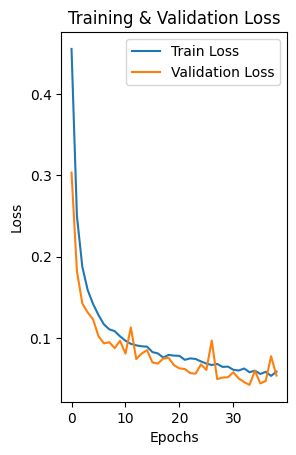

In [18]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()
